<a href="https://colab.research.google.com/github/trudo311399/Genetic-Algorthm/blob/main/GeneticAlgorthm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class GA_algorithm():
  '''
  return:
    class aims find parameter optimal for problem
  
  parameter:
    nGen is quantum parameter
    rangeOfGen is values parameter can get
    nIndividual is quantum individual
    nIterator: loop for optimal
    typeRandom: 1 is int and0 is float
  '''

  def __init__(self, nGen, rangeOfGen, nIndividual, nIterator,
               typeRandom=0, rateCross=0.9, rateMutate=0.05, elitism=2):
    self.nGen = nGen
    self.rangeOfGen = rangeOfGen
    self.nIndividual = nIndividual
    self.nIterator = nIterator
    self.rateCross = rateCross
    self.rateMutate = rateMutate
    self.elitism = elitism
    self.getOptimal = None
    self.losses = []
    self.typeRandom = typeRandom

  def getIndividual(self):
    if self.typeRandom:
      return np.random.randint(self.rangeOfGen[0], self.rangeOfGen[1] + 1, self.nGen)
    return np.random.uniform(self.rangeOfGen[0], self.rangeOfGen[1] + 1, self.nGen)

  def getPopulation(self):
    return np.array([self.getIndividual() for _ in range(self.nIndividual)])
  
  def selectionIndiviual(self, population, funcCost):
    cost = funcCost(population)
    index = np.random.choice(np.arange(self.nIndividual), self.nIndividual, p = cost/cost.sum())
    return population[index]
  
  def crossIndividual(self, individual1, individual2):
    prob= np.random.random(size = self.nGen) < self.rateCross
    individual1[prob], individual2[prob] = individual2[prob], individual1[prob].copy()
    return individual1, individual2
  
  def mutateIndividual(self, individual):
    prob= np.random.random(size = self.nGen) < self.rateMutate
    individual[prob] = self.getIndividual()[prob]
    return individual

  def optimal(self, funcCost):
    population = self.getPopulation()
    for _ in range(self.nIterator):
      population = self.selectionIndiviual(population, funcCost)
      
      for i in range(self.nIndividual//2 - 2):
          
        in1 = population[np.random.randint(0,self.nIndividual)]
        in2 = population[np.random.randint(0,self.nIndividual)]
        
        in1,in2 = self.crossIndividual(in1.copy(),in2.copy())
        
        in1 = self.mutateIndividual(in1)
        in2 = self.mutateIndividual(in2)
        
        population[i*2] = in1
        population[i*2+1] = in2
      
      indexMax = funcCost(population).argsort()[-2:]
      population[-2] = population[indexMax[0]]
      population[-1] = population[indexMax[1]]
      self.losses.append(1/(funcCost(population).sum()+1))
    self.getOptimal = population[-1]
      
    return self.getOptimal

  def showGraphLosses(self):
    if (self.losses == []):
      print("you need run optimal Function!!")
      return
      
    plt.plot(self.losses)
    plt.show()

individual optimal =  [1 1 1 1 1 1 1 1 1 1]


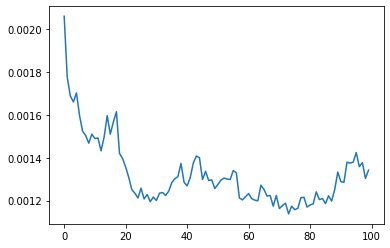

In [6]:
# One-Max
binaryMax = GA_algorithm(nGen = 10, rangeOfGen = (0,1), nIndividual=100, nIterator=100, typeRandom = 1)
print("individual optimal = ", binaryMax.optimal(lambda x : np.sum(x, axis=1)))
binaryMax.showGraphLosses()

individual optimal =  [0.19890876 0.23143094 0.60838846 1.00833745]


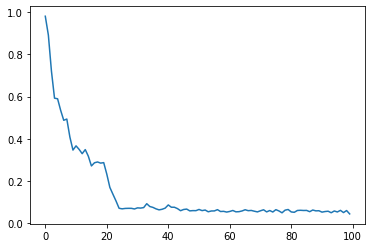

In [7]:
# MinSphere
def funcCall(population):
  fitness = np.sum(population*population, axis=1)
  return 1/(1 + fitness)

minSphere = GA_algorithm(nGen = 4, rangeOfGen = (0,100), nIndividual=100, nIterator=100)
print("individual optimal = ", minSphere.optimal(funcCall))
minSphere.showGraphLosses()

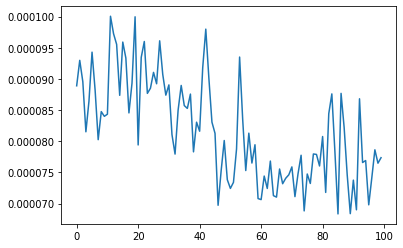

individual optimal =  [1 1 1 0 0 1 1 0 0 0 1 0]
97


In [8]:
# Knapsack
weights = np.array([1, 2, 5, 7, 10, 12, 15, 23, 32, 33, 35, 37])
prices =  np.array([1, 3, 6, 7, 12, 15, 25, 32, 44, 45, 47, 50])
maxWeight = 70

def funcCost(population):
  weight = np.sum(population*weights, axis = 1)
  price = np.sum(population*prices, axis = 1)
  for i in range(len(population)):
    if weight[i] > maxWeight:
      price[i] = 1/100000 
  return price

travelOpimal = GA_algorithm(12, (0,1), 200, 100, 1)
travelOpimal.optimal(funcCost)
travelOpimal.showGraphLosses()
print("individual optimal = ", travelOpimal.getOptimal)
print(np.sum(travelOpimal.getOptimal*prices))

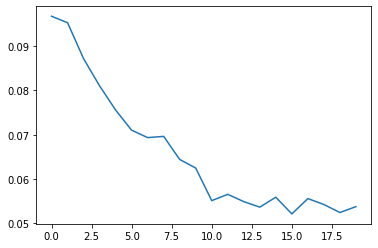

[5 4 3 2 1]
41.0


In [9]:
# Travelling
data = np.genfromtxt('/content/drive/MyDrive/AI_COLAB/Genetic-Algorthm/data_route.txt', delimiter=',')

def funcCall(population):
  cost = np.sum(data[population[:,0:-1] - 1,population[:,1:] - 1], axis=1)
  cost += data[population[:,-1] - 1,population[:,0] - 1]
  idx = [len(np.unique(i)) != len(i) for i in population]
  cost[idx] = 100000
  return 1/cost

travelOpimal = GA_algorithm(5, (1,5), 1000, 20, 1)
travelOpimal.optimal(funcCall)
travelOpimal.showGraphLosses()
a = travelOpimal.getOptimal
cost = np.sum(data[a[0:-1] - 1,a[1:] - 1])
cost += data[a[-1] - 1,a[0] - 1]
print(a)
print(cost)

In [ ]:
# Advertising
ata = np.genfromtxt('/content/drive/MyDrive/AI_COLAB/Genetic-Algorthm/advertising.csv', delimiter=',', skip_header=1)

features, yTruth = data[:, :-1], data[:, -1]
features = np.append(features, np.ones((len(data), 1)), axis=1)

def funcCall(population):
  fitness = np.zeros(population.shape[0])
  for i in range(population.shape[0]):
    y_predict = np.dot(features, population[i])
    fitness[i] = np.sum(y_predict - yTruth) ** 2
  return 1 / (1 + fitness)

advertising = GA_algorithm(nGen=4, rangeOfGen=(0, 1), nIndividual=50, nIterator=50)
print("individual optimal = ", advertising.optimal(funcCall))
advertising.showGraphLosses()
advertising.getOptimal